In [ ]:
# Import specific classes/functions from a library
from google.colab import drive
# Mount Google Drive to access files
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


**Load Data**

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
# Import necessary libraries
import numpy as np
# Import necessary libraries
import scipy.optimize


#Tableau of standard colors
# Define Tableau 20 color scheme
tableau20 = [(31, 119, 180), (255, 127, 14), (44, 160, 44), (214, 39, 40),(148, 103, 189),
  (140, 86, 75), (227, 119, 194), (127, 127, 127), (188, 189, 34), (23, 190, 207)]

  # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
# Define Tableau 20 color scheme
for i in range(len(tableau20)):
# Define Tableau 20 color scheme
  r, g, b = tableau20[i]
# Define Tableau 20 color scheme
  tableau20[i] = (r / 255., g / 255., b / 255.)

**concatenating all data**



In [ ]:
# Import necessary libraries
import os
# Import necessary libraries
import pandas as pd

# Your existing code for input_directory and concatenating all_data
input_directory = "/content/drive/My Drive/Colab Notebooks/Calcium/U18_DAY1"  # Replace this with the path to your folder
all_data = pd.DataFrame()

for i in range(5):  # Replace 5 with the actual number of files if different
    filename = f'Results_{i}.csv'
    file_path = os.path.join(input_directory, filename)
    data = pd.read_csv(file_path)
    all_data = pd.concat([all_data, data], ignore_index=True)

    #all_data = pd.concat([all_data, data.iloc[:, 1:]], ignore_index=True)

# Save all_data to a new CSV file in the same folder
output_filename = os.path.join(input_directory, 'all_data.csv')
all_data.to_csv(output_filename, index=False)


**fit and normalise all data**

In [ ]:
# Import necessary libraries
import numpy as np
# Import necessary libraries
import pandas as pd
# Import necessary libraries
import matplotlib.pyplot as plt

# Load data from CSV file
data_path = "/content/drive/My Drive/Colab Notebooks/Calcium/U18_DAY1/all_data"
# Operations using numpy
dat = np.genfromtxt(data_path + '.csv', delimiter=',')
# Operations using numpy
dat = np.delete(dat, 0, axis=0)  # Remove the first row

# Initialize final_dat to store corrected and normalized data
# Operations using numpy
final_dat = np.empty(shape=dat.shape)
#final_dat[:, 0] = dat[:, 0]

# Operations using numpy
final_dat[:, 0] = np.arange(1, dat.shape[0] + 1)  # Time points

# Loop through each neuron (column in dat) to fit, correct, and normalize data
for i in range(1, dat.shape[1]):
    print(f"Analysis Neuron {i}")

    # Polynomial fitting
# Operations using numpy
    a = np.polyfit(final_dat[:, 0], dat[:, i], 10)

    # Correct the data based on the fitted curve
# Operations using numpy
    corrected_data = dat[:, i] - np.poly1d(a)(final_dat[:, 0]) + np.poly1d(a)(final_dat[:, 0])[-1]

    # Normalize the corrected data
# Operations using numpy
    normalized_data = (corrected_data - np.mean(corrected_data)) / np.mean(corrected_data)

    # Store the normalized data in final_dat
    final_dat[:, i] = normalized_data

# Save the corrected and normalized data to a CSV file
final_dat_df = pd.DataFrame(final_dat, columns=[f"Neuron_{i}" for i in range(final_dat.shape[1])])
final_dat_df.to_csv("/content/drive/My Drive/Colab Notebooks/Calcium/U18_DAY1/new_data.csv", index=False)


Analysis Neuron 1
Analysis Neuron 2
Analysis Neuron 3
Analysis Neuron 4
Analysis Neuron 5
Analysis Neuron 6
Analysis Neuron 7
Analysis Neuron 8
Analysis Neuron 9
Analysis Neuron 10
Analysis Neuron 11
Analysis Neuron 12
Analysis Neuron 13
Analysis Neuron 14
Analysis Neuron 15
Analysis Neuron 16
Analysis Neuron 17


Total number of time points: 20000


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

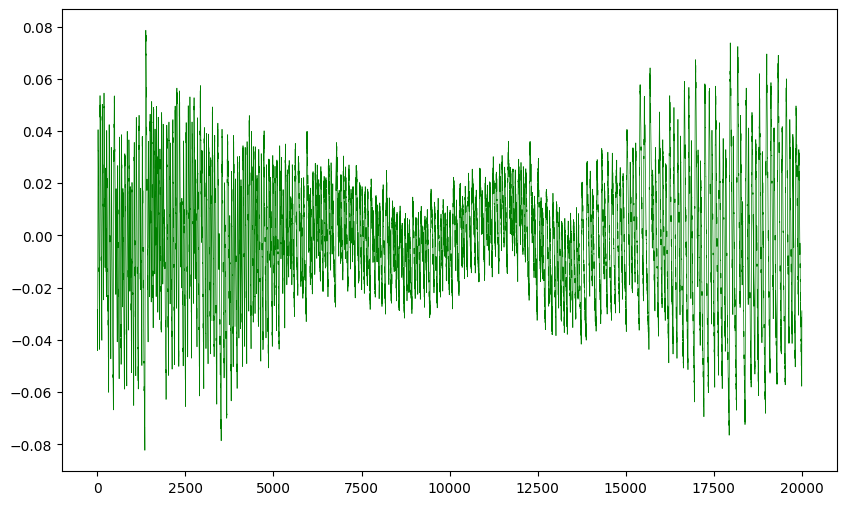

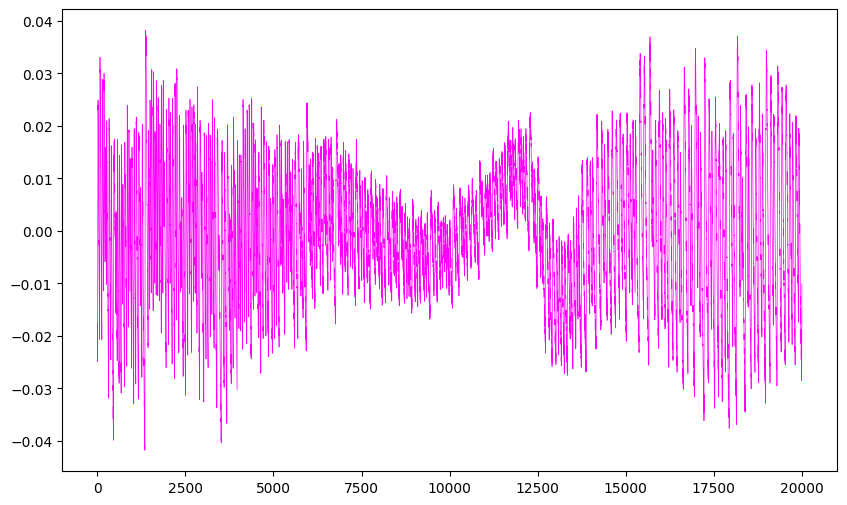

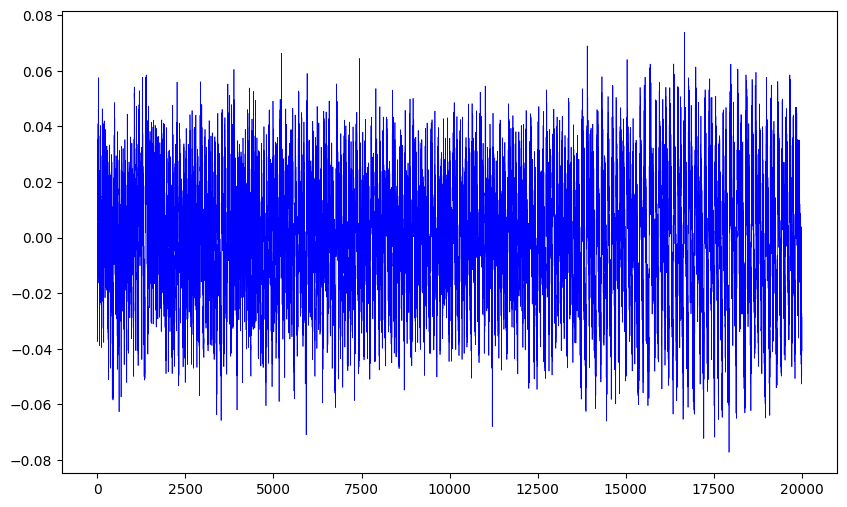

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Import necessary libraries
import pandas as pd
# Import necessary libraries
import matplotlib.pyplot as plt
# Import necessary libraries
import os

# Configuration parameters
input_file_path = "/content/drive/My Drive/Colab Notebooks/Calcium/U18_DAY1/new_data.csv"  # Path to the single CSV file
line_thickness = 0.5
zoom_range = (10000, 11000)  # Range of time points to zoom in

# Group configuration
groups = {
    # Add your actual column numbers and colors here
    'soma': ([3, 4, 5, 6, 17, 18], 'cyan'),
    'axon': ([8, 15, 16], 'green'),
    'dendrite': ([7, 14], 'magenta'),
    'synapse': ([2, 10, 9, 11, 12, 13], 'blue'),
}

# Define the columns and colors for the neuronal_structure plot
neuronal_structure_group = {
    'axon': ([14], 'green'),
    'dendrite': ([17], 'magenta'),
    'synapse': ([2], 'blue'),
    'soma': ([3], 'cyan'),
}

# Read the single CSV file
all_data = pd.read_csv(input_file_path)

# Display total number of time points
print(f'Total number of time points: {len(all_data)}')

# Plot the data
for group_name, (columns, color) in groups.items():
    # Plot all data
# Plotting using matplotlib
    plt.figure(figsize=(10, 6))
    for col in columns:
# Plotting using matplotlib
        plt.plot(all_data.iloc[:, col-1], color=color, linewidth=line_thickness, label=f'{group_name} - col {col}')
# Plotting using matplotlib
    plt.xlabel('Time-point')
# Plotting using matplotlib
    plt.ylabel('Intensity')
# Plotting using matplotlib
    plt.title(f'{group_name} - All Data')
# Plotting using matplotlib
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# Plotting using matplotlib
    plt.tight_layout()
    # Save the plot as a PDF with a transparent background in the same folder
    output_filename = os.path.join(input_directory, f'{group_name}_calcium_intensity_plot_all_data.pdf')
# Plotting using matplotlib
    plt.savefig(output_filename, format='pdf', transparent=True, bbox_inches='tight')
# Plotting using matplotlib
    plt.clf()

    # Plot zoom-in data
# Plotting using matplotlib
    plt.figure(figsize=(10, 6))
    for col in columns:

# Plotting using matplotlib
        plt.plot(all_data.iloc[zoom_range[0]:zoom_range[1], col-1], color=color, linewidth=line_thickness, label=f'{group_name} - col {col}')
# Plotting using matplotlib
    plt.xlabel('Time-point')
# Plotting using matplotlib
    plt.ylabel('Intensity')
# Plotting using matplotlib
    plt.title(f'{group_name} - Zoom-in Range ({zoom_range[0]}-{zoom_range[1]})')
# Plotting using matplotlib
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# Plotting using matplotlib
    plt.tight_layout()
    # Save the plot as a PDF with a transparent background in the same folder
    output_filename = os.path.join(input_directory, f'{group_name}_calcium_intensity_zoom_in_plot.pdf')
# Plotting using matplotlib
    plt.savefig(output_filename, format='pdf', transparent=True, bbox_inches='tight')
# Plotting using matplotlib
    plt.clf()

# Plot the neuronal_structure for all data
# Plotting using matplotlib
plt.figure(figsize=(10, 6))
for structure, (columns, color) in neuronal_structure_group.items():
    for col in columns:
# Plotting using matplotlib
        plt.figure(figsize=(10, 6))
# Plotting using matplotlib
        plt.plot(all_data.iloc[:, col-1], color=color, linewidth=line_thickness, label=structure)
# Plotting using matplotlib
plt.xlabel('Time-point')
# Plotting using matplotlib
plt.ylabel('Intensity')
# Plotting using matplotlib
plt.title('Neuronal Structure - All Data')
# Plotting using matplotlib
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Plotting using matplotlib
plt.tight_layout()
# Save the plot as a PDF with a transparent background in the same folder
output_filename = os.path.join(input_directory, 'neuronal_structure_all_data.pdf')
# Plotting using matplotlib
plt.savefig(output_filename, format='pdf', transparent=True, bbox_inches='tight')
# Plotting using matplotlib
plt.clf()

# Plot the neuronal_structure for zoom-in data
# Plotting using matplotlib
plt.figure(figsize=(10, 6))
for structure, (columns, color) in neuronal_structure_group.items():
    for col in columns:

# Plotting using matplotlib
        plt.plot(all_data.iloc[zoom_range[0]:zoom_range[1], col-1], color=color, linewidth=line_thickness, label=structure)

# Plotting using matplotlib
plt.xlabel('Time-point')
# Plotting using matplotlib
plt.ylabel('Intensity')
# Plotting using matplotlib
plt.title(f'Neuronal Structure - Zoom-in Range ({zoom_range[0]}-{zoom_range[1]})')
# Plotting using matplotlib
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Plotting using matplotlib
plt.tight_layout()
# Save the plot as a PDF with a transparent background in the same folder
output_filename = os.path.join(input_directory, 'neuronal_structure_zoom_in.pdf')
# Plotting using matplotlib
plt.savefig(output_filename, format='pdf', transparent=True, bbox_inches='tight')
# Plotting using matplotlib
plt.clf()


In [ ]:
# Import necessary libraries
import pandas as pd
# Import necessary libraries
import matplotlib.pyplot as plt
# Import necessary libraries
import os

# Configuration parameters
input_file_path = "/content/drive/My Drive/Colab Notebooks/Calcium/U18_DAY1/new_data.csv"
line_thickness = 0.5
zoom_range = (10000, 11000)

# Group configuration
groups = {
    # Add your actual column numbers and colors here
    'soma': ([3, 4, 5, 6, 17, 18], 'cyan'),
    'axon': ([8, 15, 16], 'green'),
    'dendrite': ([7, 14], 'magenta'),
    'synapse': ([2, 10, 9, 11, 12, 13], 'blue'),
}

# Define the columns and colors for the neuronal_structure plot
neuronal_structure_group = {
    'axon': ([14], 'green'),
    'dendrite': ([17], 'magenta'),
    'synapse': ([2], 'blue'),
    'soma': ([3], 'cyan'),
}


# Read the single CSV file
all_data = pd.read_csv(input_file_path)

# Display total number of time points
print(f'Total number of time points: {len(all_data)}')

# Define the directory where you want to save the output files (modify as needed)
output_directory = "/path/to/output/directory"

# Plot the data
for group_name, (columns, color) in groups.items():
    # Plot all data
# Plotting using matplotlib
    plt.figure(figsize=(10, 6))
    for col in columns:
# Plotting using matplotlib
        plt.plot(all_data.iloc[:, col-1], color=color, linewidth=line_thickness, label=f'{group_name} - col {col}')
# Plotting using matplotlib
    plt.xlabel('Time-point')
# Plotting using matplotlib
    plt.ylabel('Intensity')
# Plotting using matplotlib
    plt.title(f'{group_name} - All Data')
# Plotting using matplotlib
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# Plotting using matplotlib
    plt.tight_layout()

    # Save the plot as a PDF with a transparent background in the same folder
    output_filename = os.path.join(input_directory, f'{group_name}_calcium_intensity_plot_all_data.pdf')
# Plotting using matplotlib
    plt.savefig(output_filename, format='pdf', transparent=True, bbox_inches='tight')
# Plotting using matplotlib
    plt.clf()

    # Plot every column data
    for col in columns:
# Plotting using matplotlib
        plt.figure(figsize=(10, 6))
# Plotting using matplotlib
        plt.plot(all_data.iloc[:, col-1], color=color, linewidth=line_thickness, label=f'{group_name} - col {col}')
# Plotting using matplotlib
        plt.xlabel('Time-point')
# Plotting using matplotlib
        plt.ylabel('Intensity')
# Plotting using matplotlib
        plt.title(f'{group_name}_{col}')
# Plotting using matplotlib
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# Plotting using matplotlib
        plt.tight_layout()

        # Save the plot as a PDF with a transparent background in the same folder
        output_filename = os.path.join(input_directory, f'{group_name}_{col}.pdf')
# Plotting using matplotlib
        plt.savefig(output_filename, format='pdf', transparent=True, bbox_inches='tight')
# Plotting using matplotlib
        plt.clf()


    # Plot zoom-in data
    for col in columns:
# Plotting using matplotlib
        plt.figure(figsize=(10, 6))
# Plotting using matplotlib
        plt.plot(all_data.iloc[zoom_range[0]:zoom_range[1], col-1], color=color, linewidth=line_thickness, label=f'{group_name} - col {col}')
# Plotting using matplotlib
        plt.xlabel('Time-point')
# Plotting using matplotlib
        plt.ylabel('Intensity')
# Plotting using matplotlib
        plt.title(f'{group_name} - Zoom-in Range ({zoom_range[0]}-{zoom_range[1]})')
# Plotting using matplotlib
        plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
# Plotting using matplotlib
        plt.tight_layout()

        # Save the plot as a PDF with a transparent background in the same folder
        output_filename = os.path.join(input_directory, f'{group_name}_calcium_intensity_zoom_in_plot_col_{col}.pdf')
# Plotting using matplotlib
        plt.savefig(output_filename, format='pdf', transparent=True, bbox_inches='tight')
# Plotting using matplotlib
        plt.clf()


Total number of time points: 20000


<ipython-input-24-978d1ec0169b>:40: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>